In [55]:
# Finding trends in the most-listened songs globally on Spotify over the past 5 years
# Every Thursday, Spotify releases a Weekly Chart of the Top 200 most-listened songs
# For this project, we will look at the global chart
# Historical charts are available at https://charts.spotify.com/charts/view/regional-global-weekly/latest and downloadable as CSV files
# For this project, we have downloaded the weekly charts for the past 5 years for every 4 weeks since 2018-05-24 (roughly 5 years ago)
# These CSV files will be uploaded to GitHub under the data folder
# Then the audio features of these songs are obtained
# Then we can see if there has been a trend in audio features of the most popular songs over time (eg. have songs become more acoustic?)

In [25]:
# first I need to import the necessary packages and define a function

import requests
import pandas as pd
import plotnine as p9
from datetime import date, timedelta

AUTH_URL = 'https://accounts.spotify.com/api/token'

# remember to delete credentials when uploading to GitHub!!
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': 'xxx',
    'client_secret': 'xxx',
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [26]:
# first we need to get the dates of the charts we want to analyse
# we want to look at the charts every 4 weeks ie. 28 days
delta = timedelta(days=28)

# we want to look at the charts for the past 5 years (starting 2018-05-24 until this week)
start_spotify_dt = date(2018, 5, 24)
end_spotify_dt = date(2023, 5, 25)

# getting a list of all the chart dates
chart_dates = []
while start_spotify_dt <= end_spotify_dt:
    chart_dates.append(start_spotify_dt.isoformat())
    start_spotify_dt += delta


In [27]:
# writing the code step-by-step first

# first we want to open the CSV file as a pandas dataframe
chart_1 = pd.read_csv("/data/spotify_charts/regional-global-weekly-" + chart_dates[0] + ".csv")
chart_1

,rank,uri,artist_names,track_name,source,peak_rank,previous_rank,weeks_on_chart,streams
0,1,spotify:track:7dt6x5M1jzdTEt8oCbisTK,Post Malone,Better Now,Republic Records,1,2,4,30755342
1,2,spotify:track:7ef4DlsgrMEH11cDZd32M6,"Calvin Harris, Dua Lipa",One Kiss (with Dua Lipa),Sony Music UK,2,3,7,27907952
2,3,spotify:track:0b9oOr2ZgvyQu88wzixux9,Childish Gambino,This Is America,Wolf+Rothstein/RCA Records,1,1,3,27688906
3,4,spotify:track:1cTZMwcBJT0Ka3UJPXOeeN,Drake,Nice For What,Cash Money/Drake LP6,1,4,7,26932041
4,5,spotify:track:2XW4DbS6NddZxRPm5rMCeY,Drake,God's Plan,Cash Money/Drake LP6,1,6,18,23808225
...,...,...,...,...,...,...,...,...,...
195,196,spotify:track:7EI6Iki24tBHAMxtb4xQN2,Rita Ora,Anywhere,Rita Sahatciu Ora,39,189,31,3976696
196,197,spotify:track:7AQim7LbvFVZJE3O8TYgf2,"XXXTENTACION, Trippie Redd",Fuck Love (feat. Trippie Redd),Bad Vibes Forever / EMPIRE,41,184,39,3970794
197,198,spotify:track:3ZhTT6yjZwpPph5MIJ53XY,"Lil Skies, Landon Cube",Red Roses (feat. Landon Cube),All We Got Ent.,133,-1,13,3970058
198,199,spotify:track:0KKkJNfGyhkQ5aFogxQAPU,Bruno Mars,That's What I Like,Atlantic Records,6,198,73,3946959


In [28]:
# next we want to get the track ids of the top 50 tracks
# this is so we can use the Spotify API to get the audio features for these tracks

uris = chart_1['uri'].values.tolist()
track_ids_all = [uri.replace('spotify:track:','') for uri in uris]
track_ids_list = track_ids_all[:50]
track_ids_list

['7dt6x5M1jzdTEt8oCbisTK',
 '7ef4DlsgrMEH11cDZd32M6',
 '0b9oOr2ZgvyQu88wzixux9',
 '1cTZMwcBJT0Ka3UJPXOeeN',
 '2XW4DbS6NddZxRPm5rMCeY',
 '5SxkdsY1ufZzoq9iXceLw9',
 '3swc6WTsr7rl9DqQKQA55C',
 '39N9RPD9MRb5WmoLzNzPeA',
 '08bNPGLD8AhKpnnERrAc6G',
 '3V8UKqhEK5zBkBb6d6ub8i',
 '58q2HKrzhC3ozto2nDdN4z',
 '6vN77lE9LK6HP2DewaN6HZ',
 '514rhnksEwHUh6LxXsQ4Y9',
 '3aW0ds4A4tSQDIp75FqWTo',
 '2ARqIya5NAuvFVHSN3bL0m',
 '0e7ipj03S05BNilyu5bRzt',
 '45Egmo7icyopuzJN0oMEdk',
 '10Igtw8bSDyyFs7KIsKngZ',
 '63SevszngYpZOwf63o61K4',
 '4qKcDkK6siZ7Jp1Jb4m0aL',
 '1gm616Plq4ScqNi7TVkZ5N',
 '76cy1WJvNGJTj78UqeA5zr',
 '33IOhptvC2Qoy2UhjiHXLV',
 '5CLGzJsGqhCEECcpnFQA8x',
 '3fpVWegR6YOS1Yk5HSMYIq',
 '55S2PQgSMYAhgoTCcGCDfw',
 '6Hgh47WXVKtXN5zGOu0hjI',
 '4F1yvJfQ7gJkrcgFJQDjOr',
 '79jX8RM5CgPqDKdGEKNW9K',
 '6jA8JUuPCGYjFcgw0AoM5T',
 '6xTU6B6nFwKKTSZ9ySXS80',
 '3ee8Jmje8o58CHK66QrVC2',
 '7iDa6hUg2VgEL1o1HjmfBn',
 '6kPJZM97LwdG9QIsT7khp6',
 '6n4U3TlzUGhdSFbUUhTvLP',
 '3Wf2YGdYT8xVdNsQSoRKk9',
 '6IaieqiCVvsNvEt6Y7yOFa',
 

In [29]:
Authorization = 'Bearer ' + access_token

# lastly we simply use the Spotify API to get the audio features of these songs as a dataframe
track_ids = ','.join(track_ids_list)
audio_features_url = 'https://api.spotify.com/v1/audio-features?ids=' + track_ids
response = requests.get(audio_features_url, headers={'ids': track_ids, 'Authorization': Authorization})
audio_features_df = pd.DataFrame(data = response.json()['audio_features'])
# we also want to add the date of the chart to the dataframe
dates = [chart_dates[0]] * 50
audio_features_df['date'] = dates
audio_features_df

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,date
0,0.680,0.578,10,-5.804,1,0.0400,0.33100,0.000000,0.1350,0.3410,145.038,audio_features,7dt6x5M1jzdTEt8oCbisTK,spotify:track:7dt6x5M1jzdTEt8oCbisTK,https://api.spotify.com/v1/tracks/7dt6x5M1jzdT...,https://api.spotify.com/v1/audio-analysis/7dt6...,231267,4,2018-05-24
1,0.791,0.862,9,-3.240,0,0.1100,0.03700,0.000022,0.0814,0.5920,123.994,audio_features,7ef4DlsgrMEH11cDZd32M6,spotify:track:7ef4DlsgrMEH11cDZd32M6,https://api.spotify.com/v1/tracks/7ef4DlsgrMEH...,https://api.spotify.com/v1/audio-analysis/7ef4...,214847,4,2018-05-24
2,0.854,0.463,5,-6.159,1,0.1370,0.11700,0.000000,0.3540,0.5490,120.024,audio_features,0b9oOr2ZgvyQu88wzixux9,spotify:track:0b9oOr2ZgvyQu88wzixux9,https://api.spotify.com/v1/tracks/0b9oOr2ZgvyQ...,https://api.spotify.com/v1/audio-analysis/0b9o...,225773,4,2018-05-24
3,0.567,0.913,8,-6.471,1,0.0736,0.09340,0.000124,0.1140,0.7920,93.350,audio_features,1cTZMwcBJT0Ka3UJPXOeeN,spotify:track:1cTZMwcBJT0Ka3UJPXOeeN,https://api.spotify.com/v1/tracks/1cTZMwcBJT0K...,https://api.spotify.com/v1/audio-analysis/1cTZ...,210926,4,2018-05-24
4,0.758,0.448,7,-9.441,1,0.1030,0.03090,0.000087,0.5580,0.3730,77.176,audio_features,2XW4DbS6NddZxRPm5rMCeY,spotify:track:2XW4DbS6NddZxRPm5rMCeY,https://api.spotify.com/v1/tracks/2XW4DbS6NddZ...,https://api.spotify.com/v1/audio-analysis/2XW4...,198960,4,2018-05-24
5,0.703,0.696,0,-5.482,1,0.0529,0.03750,0.000006,0.2740,0.3660,121.969,audio_features,5SxkdsY1ufZzoq9iXceLw9,spotify:track:5SxkdsY1ufZzoq9iXceLw9,https://api.spotify.com/v1/tracks/5SxkdsY1ufZz...,https://api.spotify.com/v1/audio-analysis/5Sxk...,205947,4,2018-05-24
6,0.750,0.560,8,-8.094,1,0.1050,0.54600,0.000000,0.1110,0.4590,140.060,audio_features,3swc6WTsr7rl9DqQKQA55C,spotify:track:3swc6WTsr7rl9DqQKQA55C,https://api.spotify.com/v1/tracks/3swc6WTsr7rl...,https://api.spotify.com/v1/audio-analysis/3swc...,221440,4,2018-05-24
7,0.595,0.773,9,-4.736,0,0.0549,0.03640,0.001080,0.3340,0.7110,180.073,audio_features,39N9RPD9MRb5WmoLzNzPeA,spotify:track:39N9RPD9MRb5WmoLzNzPeA,https://api.spotify.com/v1/tracks/39N9RPD9MRb5...,https://api.spotify.com/v1/audio-analysis/39N9...,173628,4,2018-05-24
8,0.626,0.880,9,-2.384,0,0.0504,0.20500,0.000000,0.1280,0.5340,95.079,audio_features,08bNPGLD8AhKpnnERrAc6G,spotify:track:08bNPGLD8AhKpnnERrAc6G,https://api.spotify.com/v1/tracks/08bNPGLD8AhK...,https://api.spotify.com/v1/audio-analysis/08bN...,202621,4,2018-05-24
9,0.903,0.675,11,-3.445,0,0.2140,0.54200,0.000013,0.0595,0.4420,96.507,audio_features,3V8UKqhEK5zBkBb6d6ub8i,spotify:track:3V8UKqhEK5zBkBb6d6ub8i,https://api.spotify.com/v1/tracks/3V8UKqhEK5zB...,https://api.spotify.com/v1/audio-analysis/3V8U...,417920,4,2018-05-24


In [30]:
# this is just all of the above steps combined so we can iterate over all the charts

Authorization = 'Bearer ' + access_token

# creating lists of dataframes for each audio feature over time
danceability_list = []
energy_list = []
speechiness_list = []
acousticness_list = []
instrumentalness_list = []
valence_list = []
tempo_list = []
for i in range(len(chart_dates)):
    chart = pd.read_csv("/data/spotify_charts/regional-global-weekly-" + chart_dates[i] + ".csv")
    uris = chart['uri'].values.tolist()
    track_ids_all = [uri.replace('spotify:track:','') for uri in uris]
    track_ids_list = track_ids_all[:50]
    track_ids = ','.join(track_ids_list)
    audio_features_url = 'https://api.spotify.com/v1/audio-features?ids=' + track_ids
    response = requests.get(audio_features_url, headers={'ids': track_ids, 'Authorization': Authorization})
    df = pd.DataFrame(data = response.json()['audio_features'])
    dates = [chart_dates[i]] * 50
    df['date'] = dates
    # extracting the columns of the respective audio features and appending them to a list
    danceability_list.append(df[['danceability', 'date']].copy())
    energy_list.append(df[['energy', 'date']].copy())
    speechiness_list.append(df[['speechiness', 'date']].copy())
    acousticness_list.append(df[['acousticness', 'date']].copy())
    instrumentalness_list.append(df[['instrumentalness', 'date']].copy())
    valence_list.append(df[['valence', 'date']].copy())
    tempo_list.append(df[['tempo', 'date']].copy())

In [31]:
# getting weighted average value of the audio features for each chart's top 50 songs
weighted_avg_danceability_list = []
weighted_avg_energy_list = []
weighted_avg_speechiness_list = []
weighted_avg_acousticness_list = []
weighted_avg_instrumentalness_list = []
weighted_avg_valence_list = []
weighted_avg_tempo_list = []

# methodology: 
#   for each of the 50 songs, we multiply the audio feature value by the number of streams it has
#   we then sum all of these values and divide by the total number of streams for these 50 songs
#   this gives us the weighted average value of the audio features for each chart
for i in range(len(chart_dates)):
    chart = pd.read_csv("/Users/jacenhutagaol/Desktop/LSE/DS105L/LSE---DS105L---Envision/data/spotify_charts/regional-global-weekly-" + chart_dates[i] + ".csv")
    chart['streams'][:50]
    # danceability
    weighted_danceability_df = pd.DataFrame({'danceability' : danceability_list[i]['danceability'], 'streams' : chart['streams'][:50]})
    weighted_danceability_df['weighted_danceability'] = weighted_danceability_df['danceability'] * weighted_danceability_df['streams'] / weighted_danceability_df['streams'].sum()
    weighted_avg_danceability_list.append(weighted_danceability_df['weighted_danceability'].sum())
    # energy
    weighted_energy_df = pd.DataFrame({'energy' : energy_list[i]['energy'], 'streams' : chart['streams'][:50]})
    weighted_energy_df['weighted_energy'] = weighted_energy_df['energy'] * weighted_energy_df['streams'] / weighted_energy_df['streams'].sum()
    weighted_avg_energy_list.append(weighted_energy_df['weighted_energy'].sum())
    # speechiness
    weighted_speechiness_df = pd.DataFrame({'speechiness' : speechiness_list[i]['speechiness'], 'streams' : chart['streams'][:50]})
    weighted_speechiness_df['weighted_speechiness'] = weighted_speechiness_df['speechiness'] * weighted_speechiness_df['streams'] / weighted_speechiness_df['streams'].sum()
    weighted_avg_speechiness_list.append(weighted_speechiness_df['weighted_speechiness'].sum())
    # acousticness
    weighted_acousticness_df = pd.DataFrame({'acousticness' : acousticness_list[i]['acousticness'], 'streams' : chart['streams'][:50]})
    weighted_acousticness_df['weighted_acousticness'] = weighted_acousticness_df['acousticness'] * weighted_acousticness_df['streams'] / weighted_acousticness_df['streams'].sum()
    weighted_avg_acousticness_list.append(weighted_acousticness_df['weighted_acousticness'].sum())
    # instrumentalness
    weighted_instrumentalness_df = pd.DataFrame({'instrumentalness' : instrumentalness_list[i]['instrumentalness'], 'streams' : chart['streams'][:50]})
    weighted_instrumentalness_df['weighted_instrumentalness'] = weighted_instrumentalness_df['instrumentalness'] * weighted_instrumentalness_df['streams'] / weighted_instrumentalness_df['streams'].sum()
    weighted_avg_instrumentalness_list.append(weighted_instrumentalness_df['weighted_instrumentalness'].sum())
    # valence
    weighted_valence_df = pd.DataFrame({'valence' : valence_list[i]['valence'], 'streams' : chart['streams'][:50]})
    weighted_valence_df['weighted_valence'] = weighted_valence_df['valence'] * weighted_valence_df['streams'] / weighted_valence_df['streams'].sum()
    weighted_avg_valence_list.append(weighted_valence_df['weighted_valence'].sum())
    # tempo
    weighted_tempo_df = pd.DataFrame({'tempo' : tempo_list[i]['tempo'], 'streams' : chart['streams'][:50]})
    weighted_tempo_df['weighted_tempo'] = weighted_tempo_df['tempo'] * weighted_tempo_df['streams'] / weighted_tempo_df['streams'].sum()
    weighted_avg_tempo_list.append(weighted_tempo_df['weighted_tempo'].sum())

weighted_audio_features_df = pd.DataFrame({'date' : chart_dates, 
                                           'danceability' : weighted_avg_danceability_list, 
                                           'energy' : weighted_avg_energy_list, 
                                           'speechiness' : weighted_avg_speechiness_list, 
                                           'acousticness' : weighted_avg_acousticness_list, 
                                           'instrumentalness' : weighted_avg_instrumentalness_list, 
                                           'valence' : weighted_avg_valence_list, 
                                           'tempo' : weighted_avg_tempo_list})
weighted_audio_features_df

,date,danceability,energy,speechiness,acousticness,instrumentalness,valence,tempo
0,2018-05-24,0.705398,0.653658,0.109665,0.176248,0.000286,0.465891,116.883750
1,2018-06-21,0.724622,0.619597,0.123573,0.254902,0.002025,0.452323,114.996394
2,2018-07-19,0.728136,0.628063,0.119073,0.210670,0.003063,0.442464,120.263353
3,2018-08-16,0.723606,0.659409,0.132700,0.240020,0.001631,0.453655,115.407760
4,2018-09-13,0.733538,0.670481,0.152747,0.189718,0.000402,0.439076,116.469269
...,...,...,...,...,...,...,...,...
61,2023-01-26,0.687904,0.646882,0.084526,0.205125,0.025955,0.494072,121.830812
62,2023-02-23,0.683035,0.658735,0.081275,0.210040,0.023799,0.509659,124.991612
63,2023-03-23,0.682949,0.650184,0.095094,0.266614,0.019144,0.517409,123.129609
64,2023-04-20,0.679065,0.650173,0.084835,0.277603,0.010932,0.550451,124.732251


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/stats/stat_smooth.py:203: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/stats/stat_smooth.py:203: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotnine/stats/stat_smooth.py:203: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/plotn

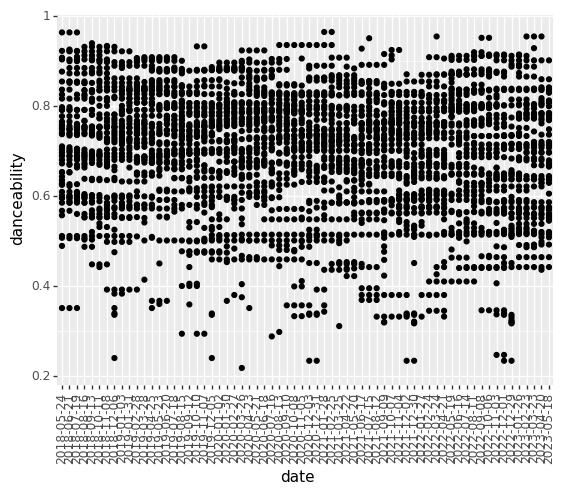

<ggplot: (312461454)>

In [62]:
# now we will create scatter plots of all the audio features over time
# we will use the ggplot library to create the plots
# we will create one scatter plot for each audio feature

# concatenating the lists of dataframes for each audio feature
danceability_df = pd.concat(danceability_list)
# creating a scatter plot based on the concatenated dataframe
danceability_p = p9.ggplot(p9.aes(x='date', y='danceability'), danceability_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90)) + p9.geom_smooth()
danceability_p

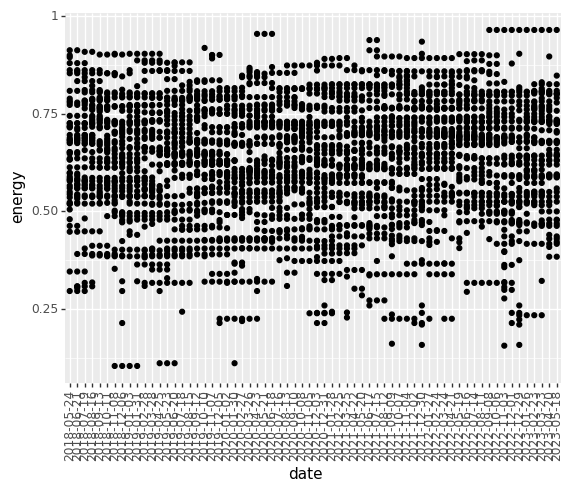

<ggplot: (312645617)>

In [63]:
energy_df = pd.concat(energy_list)
energy_p = p9.ggplot(p9.aes(x='date', y='energy'), energy_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90))
energy_p

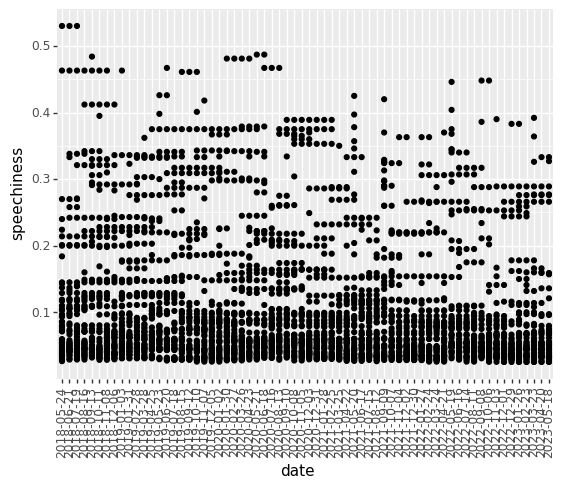

<ggplot: (311723723)>

In [64]:
speechiness_df = pd.concat(speechiness_list)
speechiness_p = p9.ggplot(p9.aes(x='date', y='speechiness'), speechiness_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90))
speechiness_p

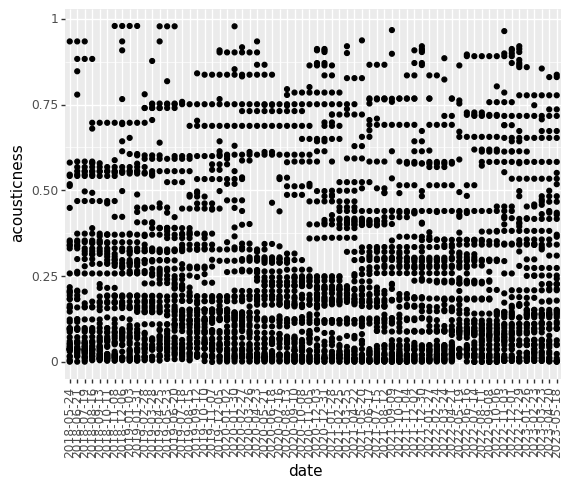

<ggplot: (311573688)>

In [65]:
acousticness_df = pd.concat(acousticness_list)
acousticness_p = p9.ggplot(p9.aes(x='date', y='acousticness'), acousticness_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90))
acousticness_p

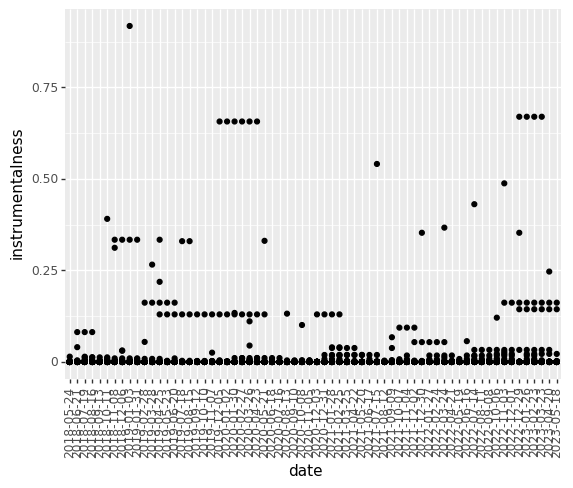

<ggplot: (311766191)>

In [66]:
instrumentalness_df = pd.concat(instrumentalness_list)
instrumentalness_p = p9.ggplot(p9.aes(x='date', y='instrumentalness'), instrumentalness_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90))
instrumentalness_p

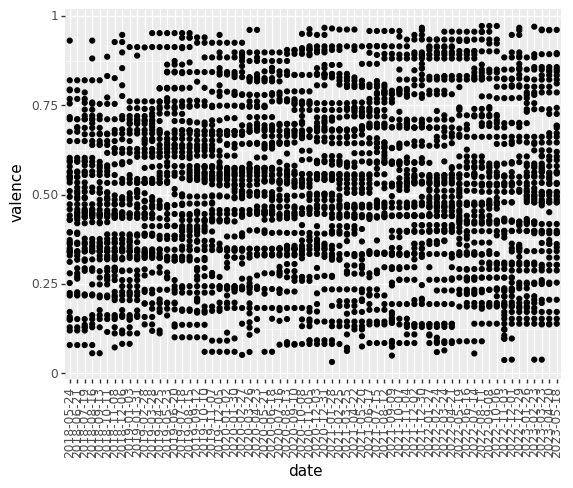

<ggplot: (311641046)>

In [67]:
valence_df = pd.concat(valence_list)
valence_p = p9.ggplot(p9.aes(x='date', y='valence'), valence_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90))
valence_p

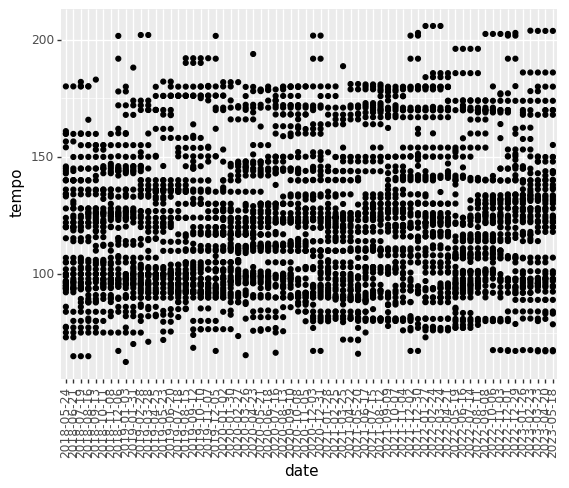

<ggplot: (312644813)>

In [68]:
tempo_df = pd.concat(tempo_list)
tempo_p = p9.ggplot(p9.aes(x='date', y='tempo'), tempo_df) + p9.geom_point() + p9.theme(axis_text_x = p9.element_text(angle=90))
tempo_p

In [ ]:
Tell me how i access another branch in the repository? I am new to this?   

